# Reto 8: Éxito ¿esfuerzo o suerte?

En la última corte de astronautas de la NASA (National Aeronautics and Space Administration) alrededor de 18.300 personas de comenzaron el proceso de selección para ser astronauta, sin embargo, solo 11 personas llegarían a serlo. Es común pensar e incluso escuchar que algunas de esas personas llegarán a esos cargos exclusivamente por su suerte, o por su desempeño. Para probar estas afirmaciones:

#### 1. Generar una lista de combinaciones de nombres y apellidos únicos para 18.300 participantes utilizando nombres y apellidos predeterminados.

In [1]:
# importar librerias
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# lista de 10 nombres
nombres = ['Andres', 'Maria', 'Manuel', 'Daniel', 'Sara', 'Cristian', 'Gabriela', 'Lucia', 'Fernanda', 'Jose']

# lista de 10 apellidos
apellidos = ['Perez', 'Gomez', 'Rodriguez', 'Garcia', 'Martinez', 'Lopez', 'Hernandez', 'Gonzalez', 'Diaz', 'Morales']

# total de participantes
tot_p = 18300

# generar nombreas aleatorios
participantes = [f'{random.choice(nombres)} {random.choice(apellidos)} {random.choice(apellidos)}' for _ in range(tot_p)]

# mostrar primeros 10
participantes[:10]

['Gabriela Gomez Hernandez',
 'Sara Gomez Diaz',
 'Sara Perez Diaz',
 'Lucia Gonzalez Garcia',
 'Gabriela Garcia Martinez',
 'Andres Lopez Gonzalez',
 'Manuel Perez Morales',
 'Maria Garcia Morales',
 'Maria Gonzalez Diaz',
 'Gabriela Gomez Morales']

#### 2. Genere dos números aleatorios entre 0 y 100 para cada participante (Los números siempre deben estar entre estos 2 valores) para el esfuerzo tome una distribución no uniforme (considere una campana de gauss o distribución normal) y para la suerte considere una distribución normal.

In [3]:
# generar valores aleatorios para Esfuerzo y Suerte

# semilla para reproducibilidad de los datos
np.random.seed(77)

# generar datos de esfuerzo con distribucion normal (media=70, std=15)
esfuerzo = np.random.normal(70,15,tot_p)
esfuerzo = np.clip(esfuerzo, 0, 100)

# verifiquemos la cantidad de numeros generados
len(esfuerzo)

18300

In [4]:
# generamos valores de suerte con distribucion normal (media=50, std=10)
suerte = np.random.normal(50,10, tot_p)
suerte = np.clip(suerte, 0, 100)

# verifiquemos la cantidad de numeros generados
len(suerte)

18300

#### 3. Pese las contribuciones de los participantes en donde el Éxito de un participante será:

#### $$Exito=0.9*Esfuerzo+0.1*Suerte$$

In [5]:
exito = 0.9 * esfuerzo + 0.1 * suerte
# mostrar los 5 primeros valores
exito[:5]

array([70.09066113, 77.74694376, 61.27115519, 74.79315249, 75.44254879])

#### 4. Determine los 11 primeros participantes que serán escogidos para ser astronautas. A partir de esto qué se puede decir de su distribución de la suerte ¿cuál es la media de la suerte que tienen?

In [8]:
# indice de los 11 con mayor exito
index_to_11 = np.argsort(exito)[-11:]
print('Valores de Exito de los 11 participantes: ',exito[index_to_11])
print('')

# suerte de lo 11 con mayor exito
suerte_top_11 = suerte[index_to_11]
print('Valores de suerte de los 11 con mayor exito: ', suerte_top_11)

Valores de Exito de los 11 participantes:  [96.99663414 97.02681326 97.12243327 97.13997309 97.19730381 97.31253438
 97.41441204 97.45040789 97.54058292 97.80363184 97.94332416]

Valores de suerte de los 11 con mayor exito:  [69.96634141 70.26813261 71.22433269 71.39973086 71.97303808 73.12534379
 74.14412043 78.76620702 75.40582923 78.0363184  79.43324163]


In [9]:
# calculo de la media de la suerte los 11 seleccionados
media_suerte_11 = np.mean(suerte_top_11)
print('La media de la suerte de los 11 seleccionados es: ',media_suerte_11)

La media de la suerte de los 11 seleccionados es:  73.97660328646106


#### 5. Repita este mismo proceso (utilice los mismos nombres que ya creó) tantas veces como sea posible (al menos 100 veces), incluso puede cambiar la distribución de esfuerzo en tipo y media. Tomando la media a través de las simulaciones realizadas de las medias de la suerte de cada uno de los 11 participantes, qué se puede inferir sobre la influencia de la suerte en el éxito.

In [10]:
# cantidad sumulaciones
simulaciones = 100
# lista para almacenar la media de la suerte de cada simulacion
medias_suerte_simulaciones = []

for _ in range(simulaciones):

    # Cambiar ligeramente la distribución de esfuerzo en cada simulación
    esfuerzo_sim = np.random.normal(70, 15, tot_p)
    esfuerzo_sim = np.clip(esfuerzo_sim, 0, 100)
    
    # Generar nueva suerte
    suerte_sim = np.random.normal(50, 10, tot_p)
    suerte_sim = np.clip(suerte_sim, 0, 100)
    
    # Calcular éxito para la simulación
    exito_sim = 0.9 * esfuerzo_sim + 0.1 * suerte_sim
    
    # Determinar los 11 mejores de cada simulación
    indices_top_11_sim = np.argsort(exito_sim)[-11:]
    top_11_suerte_sim = suerte_sim[indices_top_11_sim]
    
    # Calcular la media de la suerte de los 11 seleccionados en la simulación
    medias_suerte_simulaciones.append(np.mean(top_11_suerte_sim))

# mostrar valores de media de la suerte
medias_suerte_simulaciones

[69.72938022497515,
 72.62835935412717,
 73.98441433936078,
 73.58906280202712,
 71.54647664728698,
 77.46410133755717,
 76.47692793462586,
 73.12309527148909,
 74.30483800520709,
 71.74254597896028,
 72.61325599289152,
 73.94453056059723,
 71.16958033159985,
 72.61299050127495,
 77.33768286542058,
 71.00374616537013,
 74.23120590004238,
 73.14001771115085,
 72.3902848163169,
 74.54149723463613,
 72.18506996648125,
 72.81638351249723,
 73.93901334332368,
 74.35031742726053,
 72.93361837884277,
 74.453574920979,
 74.81158348733986,
 71.29087970104501,
 73.82971088458837,
 73.03072299221009,
 72.2968826580945,
 72.08985121243671,
 71.92643090190498,
 73.39366520851958,
 70.46546514787602,
 71.25204513932286,
 72.22639122457325,
 75.31626068526496,
 75.3322982448888,
 76.72415103925776,
 71.87609594942654,
 76.20971102250331,
 71.53442214799146,
 74.20779440454258,
 73.32812749667106,
 72.4610063600301,
 72.57320043963178,
 76.2063806022717,
 73.2319685818804,
 75.44076379703398,
 73.7175

#### 6. Haga un histograma de las medias de los 11 escogidos a lo largo de sus simulaciones.

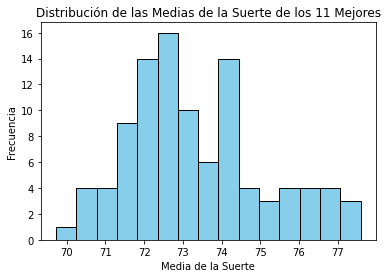

In [11]:
plt.hist(medias_suerte_simulaciones, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribución de las Medias de la Suerte de los 11 Mejores')
plt.xlabel('Media de la Suerte')
plt.ylabel('Frecuencia')
plt.show()

#### Conclusiones

Al observar los resultados graficados de las simulaciones, notamos cómo la distribución de la suerte influyen en el éxito de los participantes seleccionados. Aunque la contribución del esfuerzo es mucho mayor (la fórmula indica que es del 90%), la suerte tiene un papel importante en determinar los resultados finales debido a su variabilidad en cada simulación.